In [1]:
from glob import glob
import cv2
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Input, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(42)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train = np.array(glob("Train/*"))
X_test = np.array(glob("Validation/*"))
print(X_train.shape)
print(X_test.shape)

(897,)
(4,)


In [3]:
train = []
y_train = []
for img_path in X_train:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train.append(img)
    grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    y_train.append(grayimg.reshape([grayimg.shape[0],grayimg.shape[1],1]))
X_train = np.array(train)
y_train = np.array(y_train)
print(y_train.shape)

(897,)


In [4]:
test = []
y_test = []
for img_path in X_test:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test.append(img)
    grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    y_test.append(grayimg.reshape([grayimg.shape[0],grayimg.shape[1],1]))
X_test = np.array(test)
y_test = np.array(y_test)
print(y_test.shape)

(4,)


In [5]:
def GreyModel(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(filters = 1, kernel_size = (1, 1), strides = (1,1), padding = 'same',activation='relu')(X_input)
    model = Model(inputs = X_input, outputs = X, name='digModel')

    return model

In [6]:
model = GreyModel(input_shape = [None,None,3])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 1)     4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mean_squared_error',
              optimizer='adam')


In [8]:
prevloss = 0
currloss = 100
epsilon = 1e-3
print(epsilon)
while abs(currloss-prevloss) > epsilon:
    prevloss = currloss
    for i in range(X_train.shape[0]):
        X = X_train[0]
        Y = y_train[0]
        X = X.reshape([1,X.shape[0],X.shape[1],3])
        Y = Y.reshape([1,Y.shape[0],Y.shape[1],1])
        hist = model.fit(X, Y, epochs=1)
        currloss = list(hist.history.values())[0][0]

0.001
Epoch 1/1
1/1 [==============================] - 0s 205ms/step - loss: 32472.4414
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 32329.9277
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 32188.1621
Epoch 1/1
1/1 [==============================] - 0s 53ms/step - loss: 32046.3945
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 31904.9082
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 31763.9219
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 31623.2578
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 31482.6543
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 31342.9707
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 31203.3125
Epoch 1/1
1/1 [==============================] - 0s 59ms/step - loss: 31063.9375
Epoch 1/1
1/1 [==============================] - 0s 53ms/step - loss: 30925.2637
Epoch 1/1
1/1 [======

1/1 [==============================] - 0s 29ms/step - loss: 20186.1777
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 20086.3984
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 19986.6387
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 19887.6133
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 19788.9160
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 19690.4512
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 19592.5566
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 19495.0645
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 19397.9590
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 19301.0410
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 19204.7402
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 19108.6445
Epoch 1/1
1/1 [=======================

Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 11883.0605
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 11818.7012
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 11754.8916
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 11691.3633
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 11628.0479
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 11564.9990
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 11502.3008
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 11439.8828
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 11377.7266
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 11315.7715
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 11254.3340
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 11193.2344
Epoch 1/1
1/1 [=============

1/1 [==============================] - 0s 46ms/step - loss: 6722.5122
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 6684.2837
Epoch 1/1
1/1 [==============================] - 0s 46ms/step - loss: 6646.1968
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 6608.3716
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 6570.7539
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 6533.2603
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 6496.0195
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 6459.0063
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 6422.1650
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 6385.5732
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 6349.1445
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 6312.9653
Epoch 1/1
1/1 [==============================] - 0

Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 3739.5466
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 3718.7275
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 3698.0461
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 3677.5056
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 3657.1084
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 3636.8230
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 3616.6777
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 3596.6560
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 3576.7659
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 3557.0115
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 3537.3816
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 3517.8606
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 2183.8242
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 2173.5315
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 2163.3323
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 2153.1841
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 2143.1216
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 2133.1326
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 2123.2209
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 2113.3723
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 2103.6028
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 2093.8911
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 2084.2686
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 2074.7000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 1444.9381
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 1440.2897
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 1435.6919
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 1431.1282
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 1426.5806
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 1422.0902
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 1417.6162
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 1413.1979
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 1408.8142
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 1404.4552
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 1400.1445
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 1395.8606
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 1121.0946
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 1119.1185
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 1117.1454
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 1115.2192
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 1113.2743
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 1111.3763
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 1109.4658
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 1107.5975
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 1105.7339
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 1103.8789
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 1102.0505
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 1100.2216
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 982.7198
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 981.8422
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 980.9695
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 980.1027
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 979.2463
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 978.4103
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 977.5682
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 976.7213
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 975.8921
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 975.0606
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 974.2357
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 973.4254
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 916.0793
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 915.6008
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 915.1294
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 914.6485
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 914.1760
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 913.7172
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 913.2453
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 912.7786
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 912.3189
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 911.8506
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 911.3990
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 910.9415
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 873.7961
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 873.4396
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 873.0771
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 872.7127
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 872.3494
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 871.9976
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 871.6369
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 871.2850
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 870.9236
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 870.5675
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 870.2110
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 869.8533
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 837.9393
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 837.6058
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 837.2676
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 836.9293
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 836.5962
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 836.2590
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 835.9236
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 835.5847
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 835.2469
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 834.9104
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 834.5746
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 834.2418
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 803.0078
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 802.6714
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 802.3339
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 801.9962
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 801.6582
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 801.3224
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 800.9845
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 800.6470
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 800.3069
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 799.9683
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 799.6360
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 799.2971
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 767.6487
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 767.3057
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 766.9644
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 766.6183
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 766.2739
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 765.9290
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 765.5865
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 765.2405
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 764.8936
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 764.5518
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 764.2079
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 763.8624
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 731.6876
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 731.3396
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 730.9954
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 730.6495
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 730.2953
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 729.9448
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 729.5917
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 729.2429
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 728.8964
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 728.5450
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 728.1961
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 727.8466
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 695.2522
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 694.9040
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 694.5530
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 694.1971
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 693.8466
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 693.4941
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 693.1439
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 692.7874
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 692.4338
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 692.0864
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 691.7338
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 691.3836
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 658.5465
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 658.1923
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 657.8356
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 657.4839
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 657.1288
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 656.7776
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 656.4209
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 656.0685
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 655.7083
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 655.3569
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 655.0021
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 654.6483
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 621.7401
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 621.3913
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 621.0368
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 620.6860
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 620.3340
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 619.9840
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 619.6320
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 619.2713
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 618.9177
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 618.5667
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 618.2183
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 617.8605
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 585.0550
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 584.7063
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 584.3561
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 584.0052
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 583.6577
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 583.3011
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 582.9476
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 582.5977
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 582.2470
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 581.8992
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 581.5506
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 581.1899
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 548.6708
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 548.3257
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 547.9791
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 547.6285
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 547.2820
Epoch 1/1
1/1 [==============================] - 0s 64ms/step - loss: 546.9344
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 546.5883
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 546.2382
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 545.8922
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 545.5438
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 545.1984
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 544.8523
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 512.7693
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 512.4273
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 512.0872
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 511.7451
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 511.4011
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 511.0608
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 510.7206
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 510.3808
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 510.0406
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 509.6954
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 509.3501
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 509.0075
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 477.5334
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 477.1963
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 476.8622
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 476.5280
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 476.1930
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 475.8613
Epoch 1/1
1/1 [==============================] - 0s 50ms/step - loss: 475.5242
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 475.1890
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 474.8554
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 474.5204
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 474.1866
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 473.8508
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 443.1223
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 442.7957
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 442.4715
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 442.1461
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 441.8210
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 441.4933
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 441.1680
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 440.8434
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 440.5184
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 440.1948
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 439.8644
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 439.5379
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 409.6998
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 409.3857
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 409.0686
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 408.7507
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 408.4380
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 408.1213
Epoch 1/1
1/1 [==============================] - 0s 48ms/step - loss: 407.8072
Epoch 1/1
1/1 [==============================] - 0s 48ms/step - loss: 407.4909
Epoch 1/1
1/1 [==============================] - 0s 50ms/step - loss: 407.1744
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 406.8596
Epoch 1/1
1/1 [==============================] - 0s 47ms/step - loss: 406.5446
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 406.2299
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 377.4094
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 377.1041
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 376.7980
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 376.4950
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 376.1858
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 375.8801
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 375.5751
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 375.2731
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 374.9689
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 374.6688
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 374.3647
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 374.0620
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 346.3686
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 346.0749
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 345.7845
Epoch 1/1
1/1 [==============================] - 0s 53ms/step - loss: 345.4927
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 345.1997
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 344.9071
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 344.6169
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 344.3230
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 344.0321
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 343.7407
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 343.4507
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 343.1603
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 316.6983
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 316.4209
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 316.1440
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 315.8642
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 315.5840
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 315.3052
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 315.0251
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 314.7503
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 314.4704
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 314.1938
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 313.9168
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 313.6391
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 288.4899
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 288.2254
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 287.9611
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 287.6991
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 287.4344
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 287.1711
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 286.9084
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 286.6457
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 286.3811
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 286.1190
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 285.8560
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 285.5958
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 46ms/step - loss: 261.8227
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 261.5747
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 261.3266
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 261.0798
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 260.8315
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 260.5834
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 260.3359
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 260.0864
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 259.8379
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 259.5896
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 259.3438
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 259.0955
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 236.7578
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 236.5245
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 236.2916
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 236.0583
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 235.8253
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 235.5913
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 235.3573
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 235.1255
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 234.8940
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 234.6629
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 234.4312
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 234.2002
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 213.3243
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 213.1076
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 212.8905
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 212.6744
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 212.4576
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 212.2412
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 212.0250
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 211.8078
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 211.5914
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 211.3756
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 211.1600
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 210.9430
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 191.5458
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 191.3447
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 191.1432
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 190.9412
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 190.7399
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 190.5373
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 190.3363
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 190.1356
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 189.9351
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 189.7351
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 189.5357
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 189.3361
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 171.4233
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 171.2374
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 171.0515
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 170.8661
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 170.6815
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 170.4970
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 170.3123
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 170.1275
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 169.9428
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 169.7588
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 169.5754
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 169.3921
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 152.9343
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 152.7642
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 152.5934
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 152.4231
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 152.2537
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 152.0844
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 151.9163
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 151.7473
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 151.5791
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 151.4087
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 151.2398
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 151.0725
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 136.0411
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 135.8859
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 135.7318
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 135.5774
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 135.4232
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 135.2694
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 135.1156
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 134.9616
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 134.8073
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 134.6545
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 134.5008
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 134.3477
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 120.6967
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 120.5565
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 120.4172
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 120.2779
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 120.1381
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 119.9986
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 119.8586
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 119.7191
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 119.5795
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 119.4403
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 119.3011
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 119.1619
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 106.8279
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 106.7016
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 106.5756
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 106.4500
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 106.3239
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 106.1994
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 106.0737
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 105.9480
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 105.8224
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 105.6965
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 105.5713
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 105.4461
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 94.2488
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 94.1367
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 94.0230
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 93.9098
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 93.7971
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 93.6848
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 93.5722
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 93.4592
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 93.3464
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 93.2340
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 93.1219
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 93.0103
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 83.0050
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 82.9042
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 82.8029
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 82.7021
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 82.6017
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 82.5006
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 82.4002
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 82.3008
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 82.2001
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 82.1003
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 82.0001
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 81.9008
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 81.8

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 72.9106
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 72.8211
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 72.7313
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 72.6423
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 72.5531
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 72.4639
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 72.3755
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 72.2862
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 72.1971
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 72.1087
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 72.0198
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 71.9310
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - 

Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 63.9735
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 63.8942
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 63.8150
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 63.7365
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 63.6577
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 63.5786
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 63.4999
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 63.4214
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 63.3425
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 63.2645
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 63.1861
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 63.1077
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - 

1/1 [==============================] - 0s 20ms/step - loss: 56.1553
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 56.0856
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 56.0160
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 55.9466
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 55.8769
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 55.8073
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 55.7378
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 55.6683
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 55.5990
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 55.5301
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 55.4609
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 55.3919
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 55.3

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 49.2025
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 49.1409
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 49.0797
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 49.0180
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 48.9566
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 48.8959
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 48.8347
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 48.7736
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 48.7132
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 48.6524
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 48.5916
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 48.5307
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - 

Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 43.0894
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 43.0351
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 42.9811
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 42.9274
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 42.8735
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 42.8195
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 42.7655
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 42.7123
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 42.6590
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 42.6054
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 42.5521
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 42.4988
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 37.7657
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 37.7179
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 37.6704
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 37.6231
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 37.5757
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 37.5285
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 37.4810
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 37.4342
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 37.3868
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 37.3400
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 37.2931
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 37.2464
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 37.1

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 33.0384
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 32.9966
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 32.9550
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 32.9135
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 32.8717
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 32.8302
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 32.7886
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 32.7472
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 32.7058
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 32.6644
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 32.6233
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 32.5822
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 22ms/step - loss: 28.9159
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 28.8791
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 28.8422
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 28.8055
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 28.7685
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 28.7320
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 28.6954
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 28.6588
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 28.6223
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 28.5859
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 28.5494
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 28.5132
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 28.4

Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 25.2451
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 25.2124
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 25.1799
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 25.1475
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 25.1151
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 25.0827
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 25.0504
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 25.0182
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 24.9860
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 24.9540
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 24.9217
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 24.8897
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - 

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 22.0023
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 21.9735
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 21.9447
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 21.9161
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 21.8875
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 21.8589
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 21.8303
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 21.8018
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 21.7734
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 21.7448
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 21.7163
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 21.6880
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - 

1/1 [==============================] - 0s 21ms/step - loss: 19.1573
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 19.1318
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 19.1064
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 19.0809
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 19.0554
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 19.0300
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 19.0048
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 18.9794
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 18.9541
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 18.9288
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 18.9038
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 18.8785
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 18.8

Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 16.6084
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 16.5860
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 16.5634
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 16.5408
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 16.5183
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 16.4956
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 16.4731
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 16.4507
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 16.4282
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 16.4058
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 16.3834
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 16.3610
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - 

1/1 [==============================] - 0s 67ms/step - loss: 14.3656
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 14.3453
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 14.3253
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 14.3053
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 14.2852
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 14.2651
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 14.2452
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 14.2251
Epoch 1/1
1/1 [==============================] - 0s 48ms/step - loss: 14.2052
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 14.1853
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 14.1653
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 14.1455
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 14.1

Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 12.3530
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 12.3351
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 12.3173
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 12.2994
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 12.2816
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 12.2639
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 12.2460
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 12.2283
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 12.2107
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 12.1928
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 12.1752
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 12.1576
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 10.5827
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 10.5669
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 10.5511
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 10.5353
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 10.5194
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 10.5036
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 10.4878
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 10.4721
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 10.4564
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 10.4406
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 10.4250
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 10.4093
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 10.3

1/1 [==============================] - 0s 27ms/step - loss: 8.9990
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 8.9850
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 8.9710
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 8.9570
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 8.9430
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 8.9290
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 8.9151
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 8.9012
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 8.8873
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 8.8734
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 8.8595
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 8.8456
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 8.8318
Epoch 1/1

Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 7.5889
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 7.5766
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 7.5642
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 7.5519
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 7.5396
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 7.5273
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 7.5151
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 7.5028
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 7.4906
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 7.4783
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 7.4662
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 7.4540
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 7.4418

Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 6.3518
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 6.3410
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 6.3303
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 6.3195
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 6.3087
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 6.2980
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 6.2872
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 6.2766
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 6.2658
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 6.2552
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 6.2445
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 6.2339
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 6.2232

Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 5.2734
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 5.2640
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 5.2547
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 5.2453
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 5.2360
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 5.2267
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 5.2174
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 5.2081
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 5.1988
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 5.1895
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 5.1803
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 5.1710
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 5.1618

Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 4.3404
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 4.3323
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 4.3243
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 4.3162
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 4.3082
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 4.3001
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 4.2921
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 4.2841
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 4.2762
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 4.2682
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 4.2602
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 4.2523
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 4.2443

Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 3.5402
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 3.5333
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 3.5265
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 3.5196
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 3.5127
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 3.5058
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 3.4990
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 3.4922
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 3.4854
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 3.4786
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 3.4717
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 3.4649
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 3.4582

Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 2.8606
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 2.8548
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 2.8489
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 2.8432
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 2.8374
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 2.8316
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 2.8258
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 2.8200
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 2.8143
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 2.8085
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 2.8028
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 2.7971
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 2.7914

Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 2.2897
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 2.2848
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 2.2800
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 2.2751
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 2.2703
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 2.2654
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 2.2606
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 2.2558
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 2.2510
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 2.2462
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 2.2414
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 2.2367
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 2.2319

Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 1.8157
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 1.8116
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 1.8076
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 1.8036
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 1.7997
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 1.7957
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 1.7917
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 1.7877
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 1.7838
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 1.7798
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 1.7759
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 1.7720
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 1.7680

Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 1.4271
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 1.4238
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 1.4205
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 1.4173
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 1.4141
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 1.4108
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 1.4076
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 1.4044
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 1.4011
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 1.3979
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 1.3947
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 1.3915
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 1.3883

Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 1.1128
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 1.1101
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 1.1075
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 1.1049
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 1.1023
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 1.0997
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 1.0971
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 1.0945
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 1.0920
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 1.0894
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 1.0868
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 1.0842
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 1.0817

Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.8622
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.8601
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.8581
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.8560
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.8539
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.8519
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.8498
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.8478
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.8457
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.8437
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.8417
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.8396
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.8376

Epoch 1/1
1/1 [==============================] - 0s 47ms/step - loss: 0.6654
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6638
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.6622
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6606
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.6590
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.6574
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.6558
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.6542
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.6526
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.6510
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.6495
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.6479
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.6463

Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.5134
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.5121
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.5109
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.5097
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 0.5084
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.5072
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.5060
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.5048
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.5035
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.5023
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.5011
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.4999
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.4987

Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 0.3977
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.3968
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.3959
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.3950
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.3940
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.3931
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.3922
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.3913
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3904
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.3895
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.3885
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.3876
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.3867

Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.3114
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.3107
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.3100
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.3093
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.3086
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.3079
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.3073
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.3066
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.3059
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.3052
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.3046
Epoch 1/1
1/1 [==============================] - 0s 46ms/step - loss: 0.3039
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.3032

Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 0.2479
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.2474
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.2469
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 0.2464
Epoch 1/1
1/1 [==============================] - 0s 54ms/step - loss: 0.2459
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 0.2455
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.2450
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 0.2445
Epoch 1/1
1/1 [==============================] - 0s 49ms/step - loss: 0.2440
Epoch 1/1
1/1 [==============================] - 0s 48ms/step - loss: 0.2435
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 0.2430
Epoch 1/1
1/1 [==============================] - 0s 51ms/step - loss: 0.2425
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.2420

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.2022
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.2018
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.2015
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.2011
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.2008
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.2004
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 0.2001
Epoch 1/1
1/1 [==============================] - 0s 54ms/step - loss: 0.1997
Epoch 1/1
1/1 [==============================] - 0s 50ms/step - loss: 0.1994
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.1990
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1987
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.1983
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1980

Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1698
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.1695
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.1693
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1690
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.1688
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.1685
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1683
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.1680
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.1678
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.1675
Epoch 1/1
1/1 [==============================] - 0s 48ms/step - loss: 0.1673
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 0.1670
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.1668

Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.1471
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.1470
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.1468
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.1466
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.1464
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.1463
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1461
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.1459
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.1458
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1456
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1454
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 0.1452
Epoch 1/1
1/1 [==============================] - 0s 49ms/step - loss: 0.1451

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1315
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.1314
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1313
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1312
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1311
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.1309
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1308
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1307
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1306
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.1305
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1303
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1302
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.1301

Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.1208
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1208
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1207
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1206
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1205
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.1204
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.1204
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1203
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1202
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1201
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.1200
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1200
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.1199

Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.1135
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1135
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1134
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.1133
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1133
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1132
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.1132
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1131
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.1131
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.1130
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.1130
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1129
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1128

Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.1084
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.1083
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.1083
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.1083
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.1082
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.1082
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.1081
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.1081
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.1081
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.1080
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.1080
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1079
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.1079

Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.1047
Epoch 1/1
1/1 [==============================] - 0s 46ms/step - loss: 0.1046
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.1046
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.1046
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.1045
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.1045
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1045
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1044
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.1044
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.1044
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1044
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.1043
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1043

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1018
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.1018
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.1018
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.1017
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.1017
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.1017
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.1017
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.1016
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.1016
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.1016
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.1016
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.1015
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.1015

Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0994
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0994
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0994
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0994
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0994
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0993
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0993
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0993
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0993
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0993
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0992
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0992
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0992

Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0974
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0974
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0973
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0973
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0973
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0973
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0973
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0972
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0972
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0972
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0972
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0972
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0971

Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0954
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0954
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0954
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0954
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0954
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0954
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0953
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0953
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0953
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0953
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0953
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0952
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0952

Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.0936
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s 7ms/step - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0934


Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.0917
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0917
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0917
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0917
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0916
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0916
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0916
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0916
Epoch 1/1
1/1 [==============================] - 0s 5ms/step - loss: 0.0916
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0915
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0915
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0915
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0915


Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0898
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0898
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0898
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0898
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0898
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0898
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0897
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0897
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0897
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0897
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0897
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0896
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0896

Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0880
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0879
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0879
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0879
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0879
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0879
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0879
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0878
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0878
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0878
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0878
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0878
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0877

Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0861
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0860
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0860
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0860
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0860
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0860
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0859
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0859
Epoch 1/1
1/1 [==============================] - 0s 8ms/step - loss: 0.0859
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0859
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.0859
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0859
Epoch 1/1
1/1 [==============================] - 0s 8ms/step - loss: 0.0858
E

Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0841
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0841
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0841
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0841
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0841
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0840
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0840
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0840
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.0840
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0840
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.0839
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0839
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0839

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0822
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0822
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0822
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.0821
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0821
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0821
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0821
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0821
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0820
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0820
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0820
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.0820
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0820

Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.0802
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0802
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.0802
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0802
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0802
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0801
Epoch 1/1
1/1 [==============================] - 0s 6ms/step - loss: 0.0801
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0801
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.0801
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0801
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0801
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0800
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0800


Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0783
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.0783
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0781

Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0763
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0763
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0763
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0763
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0762
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0762
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0762
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0762
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.0762
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0761
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0761
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0761
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0761

Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0744
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.0743
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0743
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0743
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.0743
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0743
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0742
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0742
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0742
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0742
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0742
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0741
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.0741

Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0724
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0724
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0724
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0723
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0723
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0723
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0723
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0723
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0723
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0722
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0722
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.0722
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0722

Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 0.0705
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 0.0704
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0704
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 0.0704
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0704
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0704
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0704
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0703
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0703
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 0.0703
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 0.0703
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0703
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0702

Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0685
Epoch 1/1
1/1 [==============================] - 0s 48ms/step - loss: 0.0685
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0685
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0685
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0685
Epoch 1/1
1/1 [==============================] - 0s 46ms/step - loss: 0.0685
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0684
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0684
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0684
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0684
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0684
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0683
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 0.0683

Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0667
Epoch 1/1
1/1 [==============================] - 0s 55ms/step - loss: 0.0666
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0666
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0666
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0666
Epoch 1/1
1/1 [==============================] - 0s 60ms/step - loss: 0.0666
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0666
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.0665
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0665
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0665
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0665
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0665
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0664

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0648
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0648
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0648
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0647
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 0.0647
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 0.0647
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0647
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0647
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 0.0647
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0646
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0646
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0646
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0646

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0630
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0630
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s 46ms/step - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0628
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 0.0628
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.0628
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0628
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0628

Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0612
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0612
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0612
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0612
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0611
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0611
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0611
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0611
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0611
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0611
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0611
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0610
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0610

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0595
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0595
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0595
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0594
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0594
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0594
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0594
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0594
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0594
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0594
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0593
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0593
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0593

Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0578
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0578
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0578
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0578
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0578
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0578
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0577
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0577
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0577
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0577
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0577
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0577
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0577

Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0562
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0562
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0562
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0562
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0562
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0562
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0562
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0561
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0561
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0561
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0561
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0561
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0561

Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0547
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0547
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0547
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0547
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0547
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0546
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0546
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0546
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0546
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0546
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0546
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0546
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0545

Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0533
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0533
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0532
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0532
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0532
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0532
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.0532
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0532
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0532
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0531
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0531
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0531
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0531

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0519
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0519
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0519
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0519
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0518
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0518
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0518
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0518
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0518
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0518
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0518
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0518
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0517

Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0505

Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0494
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0494
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0494
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0494
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0493

Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0483
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0481
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0481

Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0472
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0472
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0472
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0472
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0472
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0472
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0472
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0472
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0471
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0471
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0471
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0471
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0471

Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0463
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0463
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0463
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0462
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0462

Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0454
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0454
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0454
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0454
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0454
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0454
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0454
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0454
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0453
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0453
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0453
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0453
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0453

Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0446
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0445
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0445

Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0439
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0439

Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0432
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0432

Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0428
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0428
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0427

Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0422

Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0419
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0419
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0419
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0419
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.0419
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0419
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0419
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0419
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0418
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0418
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0418
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0418
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0418

Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0415
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0415

Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0412
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0412

Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0410

Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 55ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 57ms/step - loss: 0.0408

Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 44ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0406

Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 63ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 48ms/step - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 0.0405

Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 45ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 0.0404

Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 50ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0403

Epoch 1/1
1/1 [==============================] - 0s 53ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 43ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 67ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 42ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0403

Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 33ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 41ms/step - loss: 0.0402

Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 40ms/step - loss: 0.0402

Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 38ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 34ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 39ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 37ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0402

Epoch 1/1
1/1 [==============================] - 0s 9ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0401


Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 21ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0401

Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 26ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 32ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 29ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0401

Epoch 1/1
1/1 [==============================] - 0s 30ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 23ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 24ms/step - loss: 0.0401

Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 20ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 31ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 36ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 28ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 25ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 27ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 35ms/step - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s 22ms/step - loss: 0.0401

In [9]:
model.save_weights("weights.h5")

model.load_weights("weights.h5")

In [10]:
def convert(img):
    img = img.reshape([1,img.shape[0],img.shape[1],3])
    ans = model.predict(img)
    greyimg = ans.reshape([ans.shape[1],ans.shape[2]])
    return greyimg

(242, 328, 3)


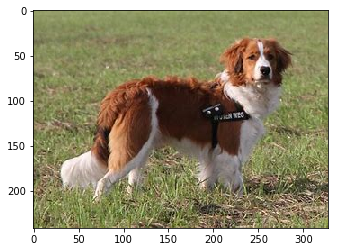

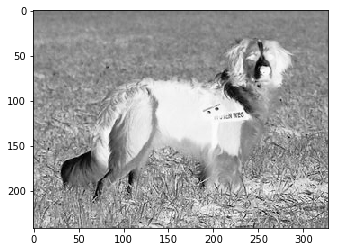

<function matplotlib.pyplot.show>

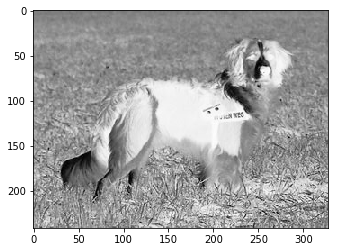

In [11]:
index = np.random.randint(0,X_test.shape[0])
print(X_test[index].shape)
plt.imshow(X_test[index])
plt.show()

#Converting using Model
grey = convert(X_test[index])
plt.imshow(grey,cmap='Greys')
plt.show()

#Converting using cv2
grey = y_test[index].reshape([y_test[index].shape[0],y_test[index].shape[1]])
plt.imshow(grey,cmap='Greys')
plt.show